In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [17]:
rcParams['font.size']=18
rcParams['figure.figsize'] = (12,8)

In [2]:
import kid_readout.analysis.archive

/home/local/lib/python2.7/site-packages/matplotlib/__init__.py:1318: UserWarning:  This call to matplotlib.use() has no effect
because the backend has already been chosen;
matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

  warnings.warn(_use_error_msg)
:0: FutureWarning: IPython widgets are experimental and may change in the future.


no data directory set up for artemis.phys.columbia.edu defaulting to /data
updated file list


Data with source attenuated so much that it's basically off

In [3]:
pkls_low_power = kid_readout.analysis.archive.load_noise_pkl('/data/readout/pkl/2015-05-19_101902_mmw_continuous-wave_148_GHz.pkl')

Data with source in continuous wave mode at high power

In [4]:
pkls_high_power_cw = kid_readout.analysis.archive.load_noise_pkl('/data/readout/pkl/2015-05-20_105213_mmw_continuous-wave_148_GHz.pkl')

Data with source in broadband mode at high power

In [5]:
pkls_high_power_wide = kid_readout.analysis.archive.load_noise_pkl('/data/readout/pkl/2015-05-13_154402_mmw_noise_broadband.pkl')

Select data with probe tone powers such that amplifier noise floor is similar

In [14]:
high_cw = [nm for nm in pkls_high_power_cw if nm.atten==26]
high_wide = [nm for nm in pkls_high_power_wide if nm.atten==29]
low_cw  = [nm for nm in pkls_low_power if nm.atten==35]

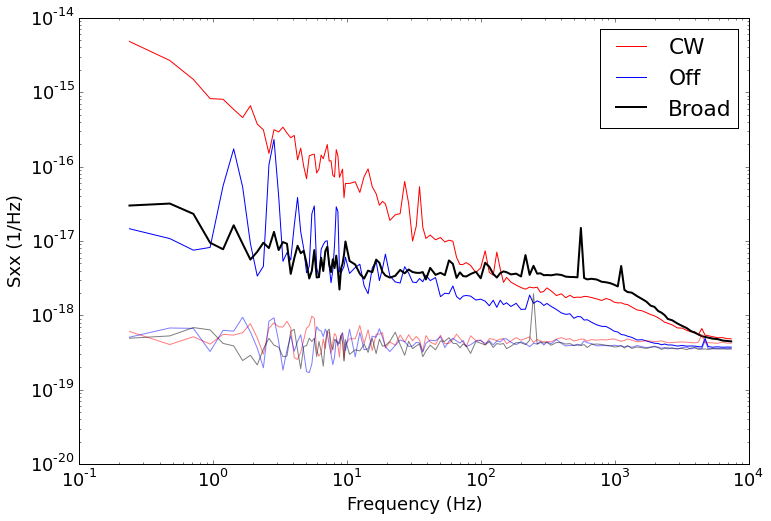

In [21]:
loglog(high_cw[0].pca_freq,high_cw[0].pca_eigvals[1,:],color='r',label='CW')
loglog(low_cw[0].pca_freq,low_cw[0].pca_eigvals[1,:],color='blue',label='Off')
loglog(high_cw[0].pca_freq,high_wide[0].pca_eigvals[1,:],color='black',lw=2,label='Broad')
loglog(high_cw[0].pca_freq,high_cw[0].pca_eigvals[0,:],color='r',alpha=0.5)
loglog(low_cw[0].pca_freq,low_cw[0].pca_eigvals[0,:],color='blue',alpha=0.5)
loglog(high_cw[0].pca_freq,high_wide[0].pca_eigvals[0,:],color='black',alpha=0.5)
legend()
ylabel('Sxx (1/Hz)')
xlabel('Frequency (Hz)')

In [7]:
import kid_readout.analysis.cross_spectrum
reload(kid_readout.analysis.cross_spectrum)

<module 'kid_readout.analysis.cross_spectrum' from '/home/gjones/readout/kid_readout/kid_readout/analysis/cross_spectrum.pyc'>

0.149471264345
0.0364462706398


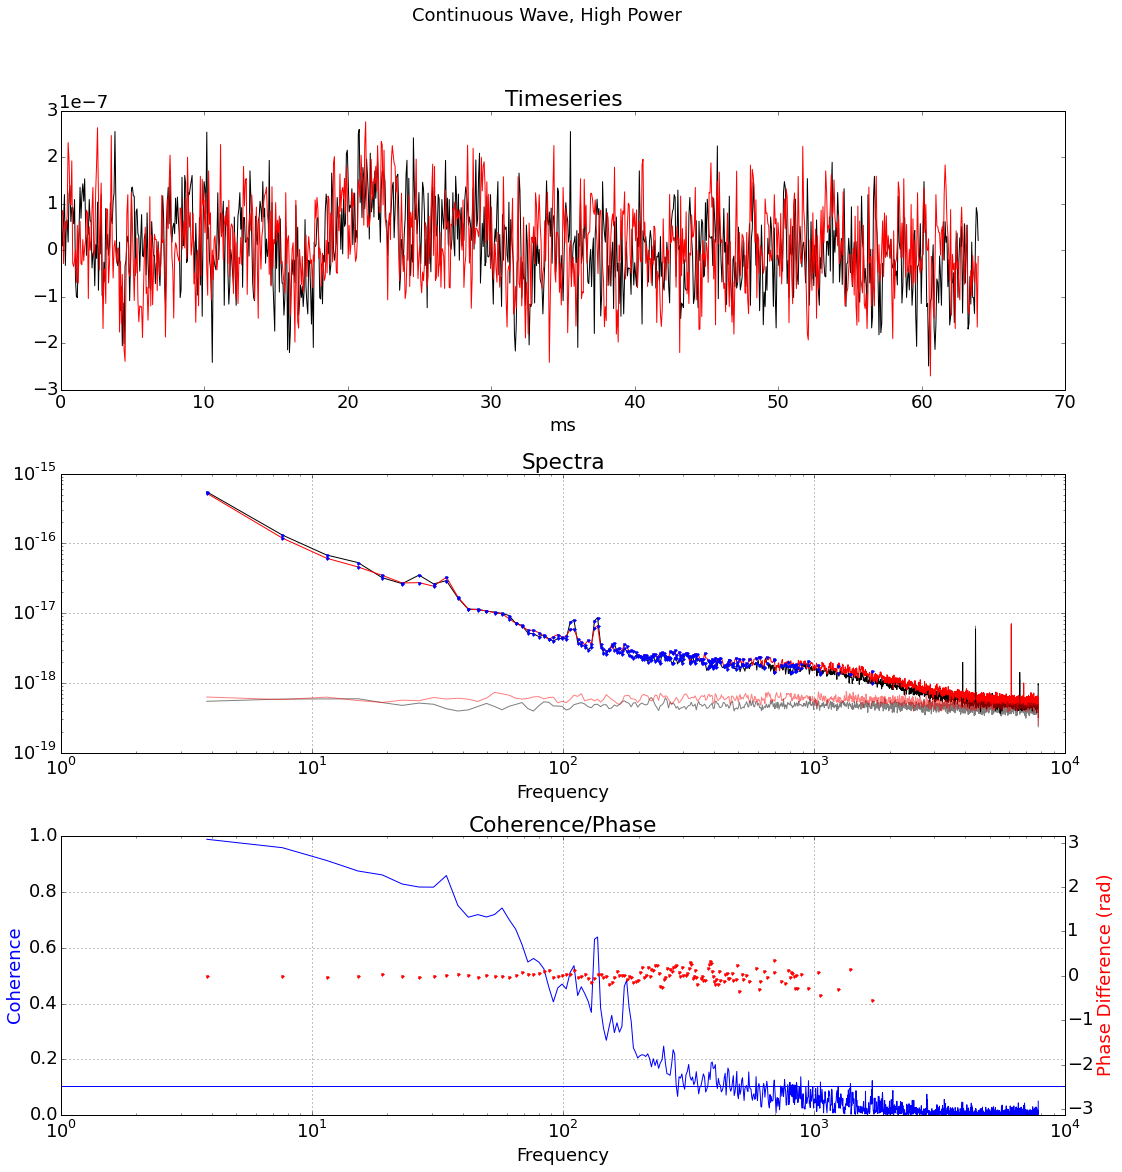

In [22]:
cs = kid_readout.analysis.cross_spectrum.CrossSpectralAnalysis(high_cw[0],high_cw[2])
cs.calculate(2**12,thresh=0.999)
cs.plot()
suptitle('Continuous Wave, High Power')

0.127761119738
0.127761119738


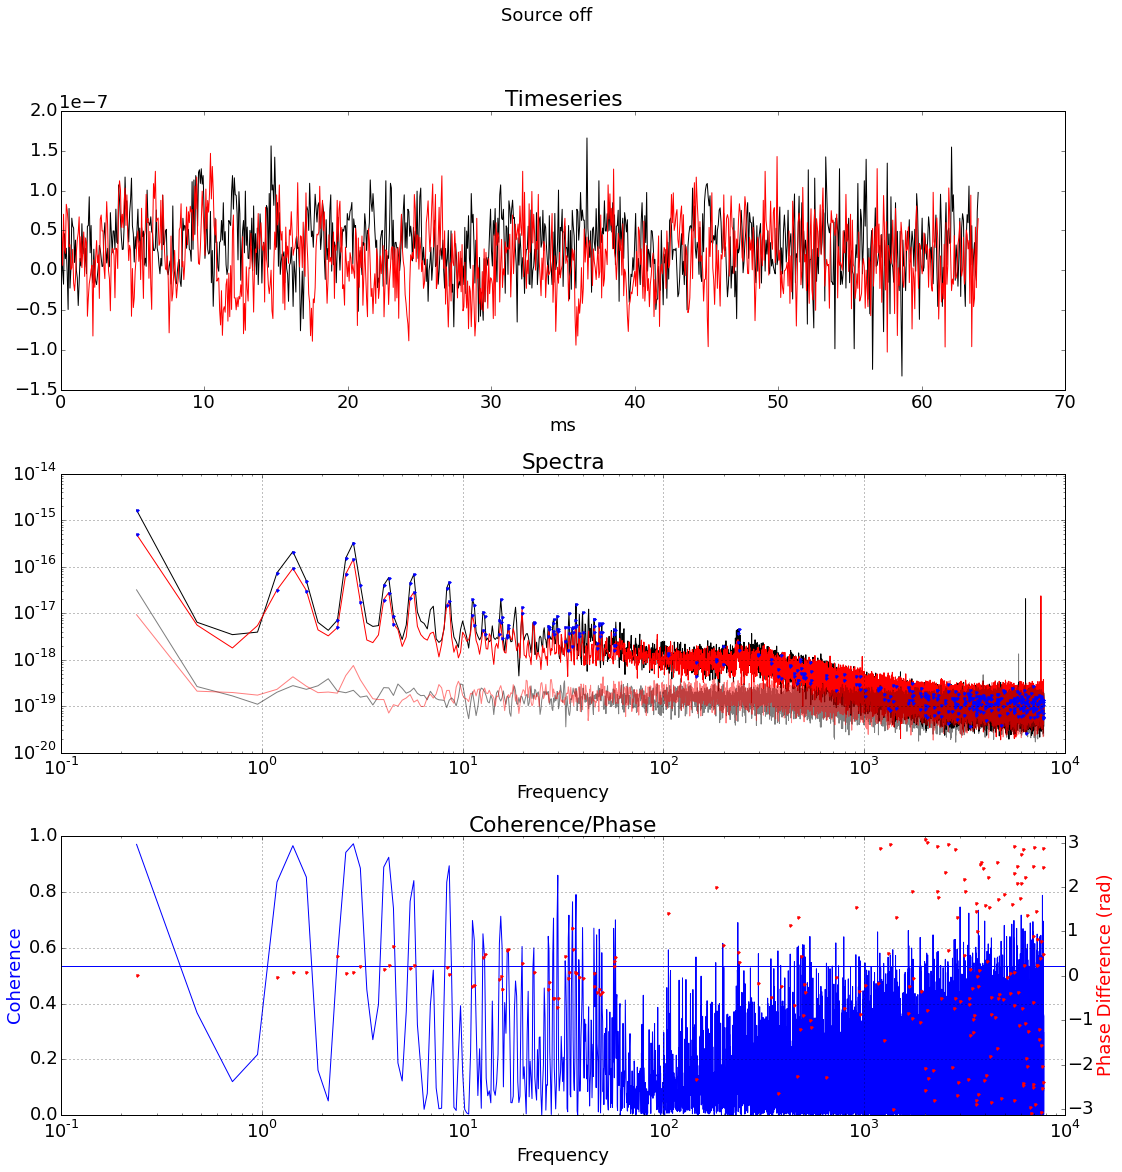

In [23]:
cs = kid_readout.analysis.cross_spectrum.CrossSpectralAnalysis(low_cw[4],low_cw[2])
cs.calculate(2**16,thresh=0.9)
cs.plot()
suptitle('Source off')

0.197170233322
0.0961301456197


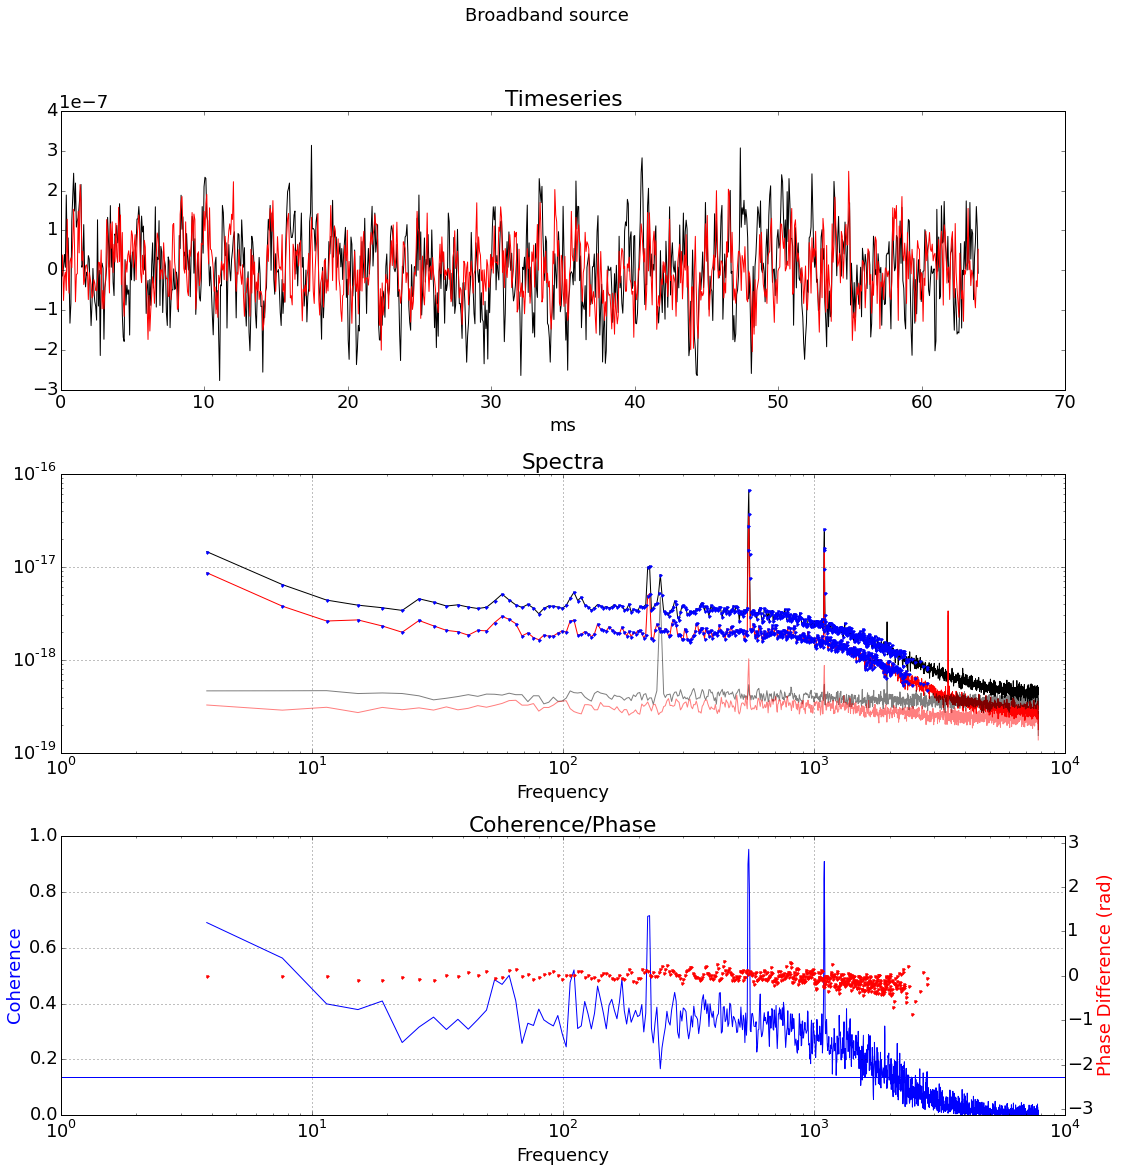

In [24]:
cs = kid_readout.analysis.cross_spectrum.CrossSpectralAnalysis(high_wide[0],high_wide[2])
cs.calculate(2**12,thresh=0.9999)
cs.plot()
suptitle('Broadband source')

0.126131647329
0.00742890951085


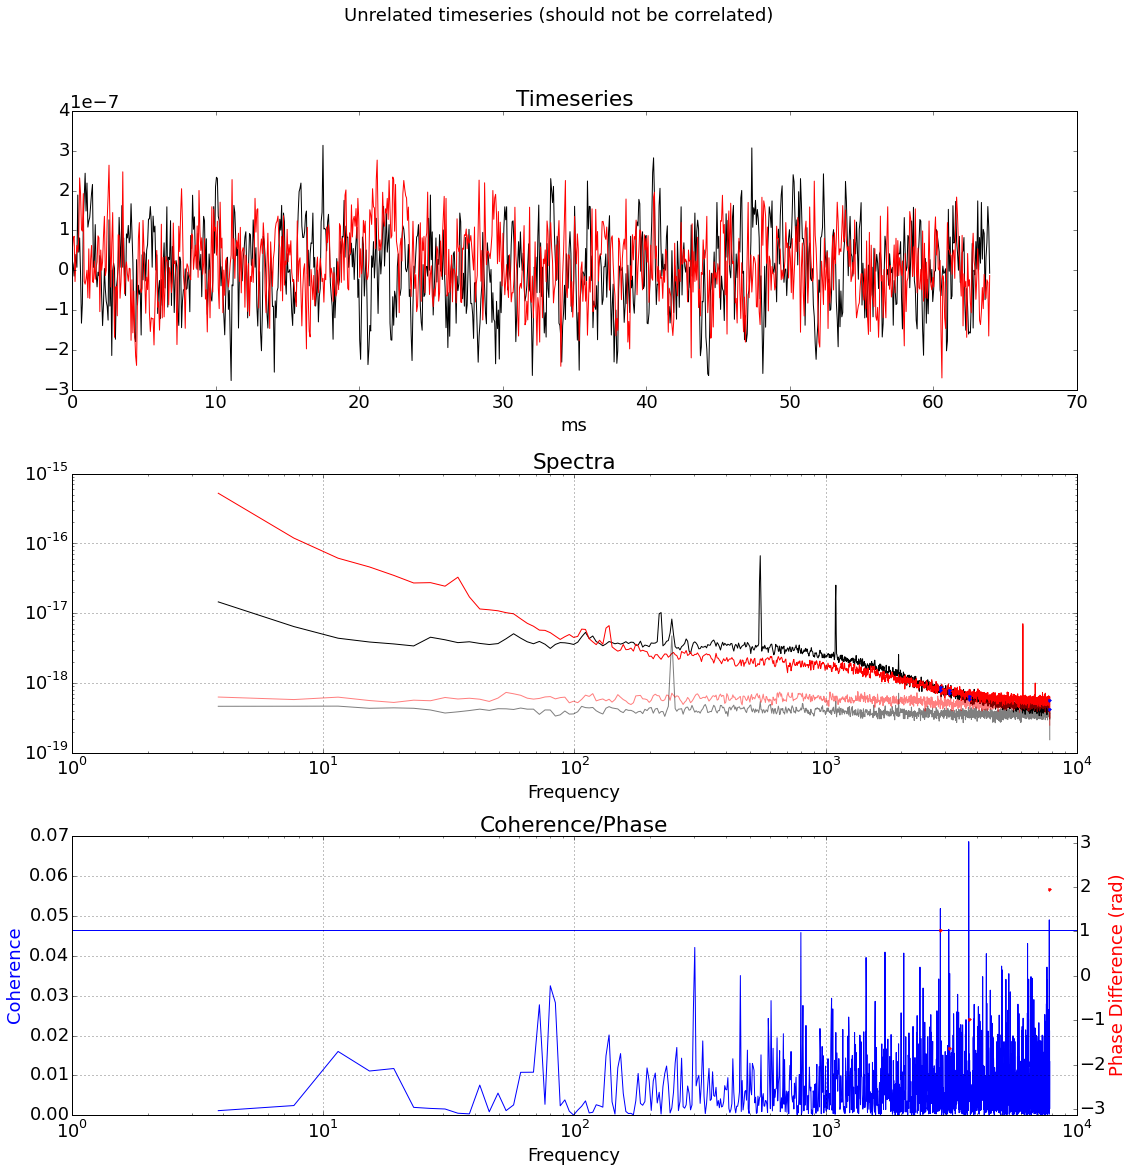

In [26]:
cs = kid_readout.analysis.cross_spectrum.CrossSpectralAnalysis(high_wide[0],high_cw[2])
cs.calculate(2**12)
cs.plot()
suptitle('Unrelated timeseries (should not be correlated)')

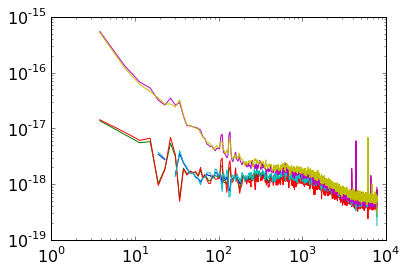

In [182]:
#loglog(cs.coh_freq,np.abs(cs.csd))
loglog(cs.freq,cs.pxx1-(np.abs(cs.csd)*cs.pxx1/cs.pxx2))
loglog(cs.freq,cs.pxx2-(np.abs(cs.csd)*cs.pxx2/cs.pxx1))
loglog(cs.freq,cs.pxx1-(np.abs(cs.csd)))
loglog(cs.freq,cs.pxx2-(np.abs(cs.csd)))
loglog(cs.freq,cs.pxx1)
loglog(cs.freq,cs.pxx2)


(0.1, 100.0)

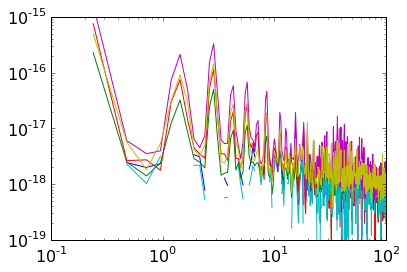

In [186]:
#loglog(cs.coh_freq,np.abs(cs.csd))
loglog(cs.freq,cs.pxx1-(np.abs(cs.csd)*cs.pxx1/cs.pxx2))
loglog(cs.freq,cs.pxx2-(np.abs(cs.csd)*cs.pxx2/cs.pxx1))
loglog(cs.freq,cs.pxx1-(np.abs(cs.csd)))
loglog(cs.freq,cs.pxx2-(np.abs(cs.csd)))
loglog(cs.freq,cs.pxx1)
loglog(cs.freq,cs.pxx2)
ylim(1e-19,1e-15)
xlim(1e-1,1e2)